In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from umap import UMAP

In [29]:
result = np.load('../output/V1_Breast_Cancer_Block_A_Section_1/SpatialGSC/SpatialGCS_result.npz')['latent_z']
print(result.shape)

(3798, 16)


In [30]:
result_umap = UMAP(n_neighbors=20, metric='cosine', random_state=42).fit_transform(result)

In [35]:
df_meta  = pd.read_csv('../output/V1_Breast_Cancer_Block_A_Section_1/Seurat_spatial/metadata.tsv', sep='\t')
df_meta.head()

,orig.ident,nCount_Spatial,nFeature_Spatial,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters
AAACAAGTATCTCCCA-1,SeuratProject,12072,4408,19774,4640,0,0
AAACACCAATAACTGC-1,SeuratProject,54083,9001,21135,6559,1,1
AAACAGAGCGACTCCT-1,SeuratProject,4237,2377,18940,4827,6,6
AAACAGGGTCTATATT-1,SeuratProject,22649,5846,21554,5843,0,0
AAACAGTGTTCCTGGG-1,SeuratProject,51367,8691,21101,6375,1,1


In [36]:
from sknetwork.clustering import Louvain, BiLouvain, modularity, bimodularity
from sklearn.neighbors import kneighbors_graph

In [37]:
adjacency = kneighbors_graph(result, 20, mode='connectivity', include_self=True)
louvain = Louvain()
labels = louvain.fit_transform(adjacency)

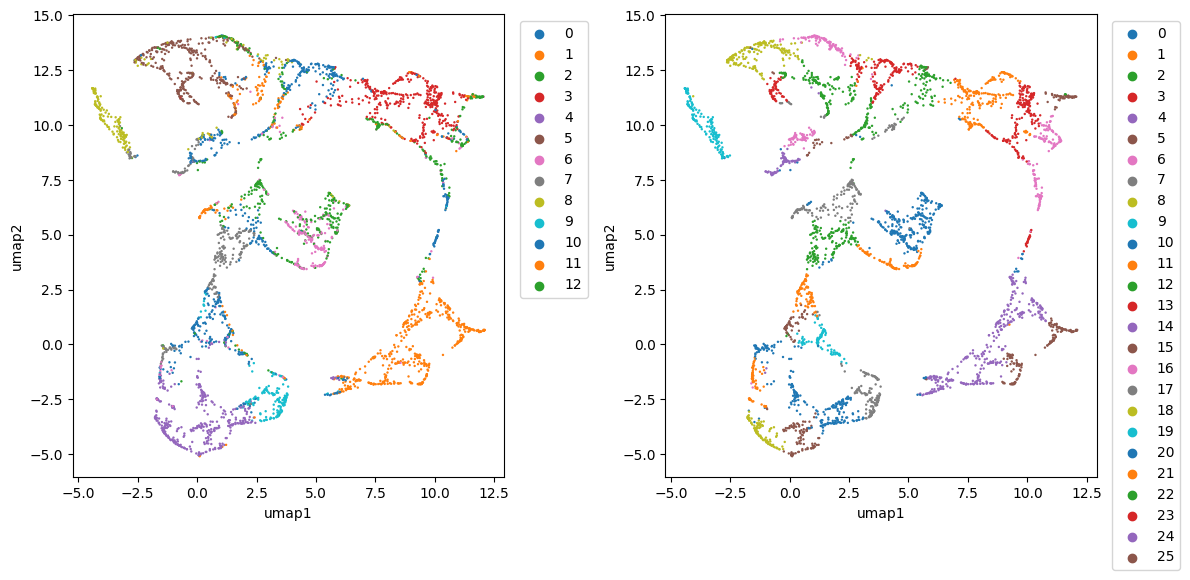

In [38]:
df_result = pd.DataFrame(result_umap, columns=['umap1', 'umap2'])
df_result['seurat_labels'] = df_meta['seurat_clusters'].values
df_result['GSC_labels'] = labels

fig, axes = plt.subplots(1, 2, dpi=100, figsize=(12,6))
sns.scatterplot(data=df_result, x='umap1', y='umap2', hue='seurat_labels', palette='tab10', s=3, linewidth=0, ax=axes[0])
sns.scatterplot(data=df_result, x='umap1', y='umap2', hue='GSC_labels', palette='tab10', s=3, linewidth=0, ax=axes[1])

axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left' )
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left' )
plt.tight_layout()

In [40]:
df_result.to_csv('../output/V1_Breast_Cancer_Block_A_Section_1/SpatialGSC/clustering_result.tsv', sep='\t', index=False)